# How to train a predicitve machine learning to predict Premier League Matches

## Table Of Contents
1. [Abstract](#abstract)
2. [Learning Objectives](#learning-objectives)
3. [Import Libraries](#1-import-librarires)
4. [Retrieve Dataset](#4-retrieve-dataset)
5. [Data Preprocessing](#5-data-preprocessing)
6. [Building Neural Network with Pytorch](#6-building-neural-network-with-pytorch)
7. [Train Model](#7-train-model)
8. [Plot the loss of model over training](#8-plot-the-loss-of-your-model-over-training)
9. [Evaluate Model After Training](#9-evaluate-performance-of-the-model)
10. [Hyperparameter Tuning](#10-hyperparameter-tuning)
11. [Final Model](#11-final-model)
12. [Display Predictions](#12-display-Predictions)
13. [Conclusion](#13-conclusion)
14. [Enhancements From Source Tutorials](#14-differences-and-similarities)
15. [References](#15-references)


<a id='abstract'></a>

## 1. Abstract


This tutorial presents a comprehensive guide to predicting Premier League football matches using a machine learning pipeline in PyTorch. The tutorial covers essential steps, including data retrieval, preprocessing, feature selection, and normalization. We delve into neural network architecture design and training, fine-tune model parameters through hyperparameter tuning, and evaluate model performance. By integrating both team and opponent data, the tutorial highlights the significance of context in predictive modeling. The final model, trained with optimal hyperparameters, demonstrates the practical application of machine learning in sports analytics.

## 2. Learning Objectives
<a id='learning-objectives'></a>

- Data preprocessing and normalisation

- Feature selection: Find the best subset of features using filters

- Model Building: Learn how to build a neural network using Pytorch

- Model Training and Prediction: Learning how to train a machine learning model and plot loss function.

- Model Evaluation: Gaining skills in evaluating the performance of machine learning models using metrics like accuracy and precision. As well as using visualisations such as confusion matrix

- Hyperparameter tuning: Learn how to optimise our neural network by means of hyperparameter tuning

- How to utilise pandas to output final predictions in readable format


### 3. Import librarires to be used throughout the tutorial
<a id='1-import-librarires'></a>

In [2055]:
# For NumPy
import numpy as np
# For PyTorch
import torch
# For matplotlib
import matplotlib.pyplot as plt
# For pandas
import pandas as pd


<a id='4-retrieve-dataset'></a>
### 4. Retrieve dataset

We'll be diving into the heart of our predictive model: the dataset. For this tutorial, we're using a comprehensive dataset of Premier League matches. This dataset offers a rich compilation of match data, providing a solid foundation for our predictive analysis.

We start by importing our dataset into our Python environment. This dataset, aptly named match_data.csv, encompasses a range of match-specific details, essential for our analysis. You can download this dataset directly from the provided Kaggle link [here](https://www.kaggle.com/datasets/mchinaka/epl-match-data-202021-202324/settings). Once downloaded, place it in an accessible directory for this tutorial.

Let's load our dataset using Pandas, an indispensable tool in our data science arsenal, and glimpse the structure and breadth of our data.

In [2056]:
# eventually change this to fetch from my kaggle
matches = pd.read_csv('match_data.csv')

In [2057]:
# print the shape of the dataframe
matches.shape

(2036, 55)

In [2058]:
# Set Pandas display options to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
matches.head()

,Unnamed: 0,date,time,comp,round,day,venue,result,gf,ga,opponent,xg_x,xga,poss,attendance,captain,formation,referee,match report,notes,sh,sot,dist,xg_y,npxg,g-xg,sota,saves,save%,att (gk),thr,psxg,psxg+/-,ast,xag,xa,kp,1/3,ppa,crspa,prgp,attempted passes,completed passes,corner kicks,shots blocked,tkl+int,err,mid 3rd,att pen,att 3rd,fls,fld,off,season,team
0,1364,2020-09-12,12:30,Premier League,Matchweek 1,Sat,Away,W,3.0,0.0,Fulham,1.9,0.1,54.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Chris Kavanagh,Match Report,NaN,13.0,5.0,14.1,1.9,1.9,1.1,2.0,2.0,100.0,29.0,3.0,0.1,0.1,2,0.8,1.0,8.0,38.0,11.0,1.0,47.0,668.0,589.0,3.0,1.0,30,0.0,343.0,26.0,145.0,12.0,12.0,2.0,2021,Arsenal
1,1365,2020-09-19,20:00,Premier League,Matchweek 2,Sat,Home,W,2.0,1.0,West Ham,1.1,2.0,62.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Michael Oliver,Match Report,NaN,7.0,3.0,14.8,1.1,1.1,0.9,2.0,1.0,50.0,32.0,6.0,0.7,-0.3,2,1.1,1.6,6.0,38.0,16.0,3.0,52.0,710.0,599.0,7.0,6.0,19,1.0,423.0,28.0,166.0,11.0,12.0,5.0,2021,Arsenal
2,1366,2020-09-28,20:00,Premier League,Matchweek 3,Mon,Away,L,1.0,3.0,Liverpool,1.3,2.7,34.0,NaN,Pierre-Emerick Aubameyang,3-4-3,Craig Pawson,Match Report,NaN,4.0,3.0,15.0,1.3,1.3,-0.3,8.0,5.0,62.5,34.0,6.0,2.6,-0.4,0,0.8,0.6,3.0,11.0,1.0,0.0,13.0,425.0,312.0,3.0,6.0,18,1.0,174.0,10.0,44.0,7.0,11.0,5.0,2021,Arsenal
3,1367,2020-10-04,14:00,Premier League,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.6,0.2,64.0,NaN,Pierre-Emerick Aubameyang,4-3-3,Lee Mason,Match Report,NaN,6.0,5.0,16.3,0.6,0.6,1.4,2.0,1.0,50.0,37.0,2.0,0.4,-0.6,2,0.6,0.6,6.0,41.0,4.0,1.0,49.0,741.0,646.0,2.0,2.0,18,1.0,410.0,14.0,169.0,3.0,8.0,0.0,2021,Arsenal
4,1368,2020-10-17,17:30,Premier League,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,1.3,42.0,NaN,Pierre-Emerick Aubameyang,4-3-3,Chris Kavanagh,Match Report,NaN,11.0,3.0,18.4,0.9,0.9,-0.9,5.0,4.0,80.0,48.0,4.0,1.4,0.4,0,0.7,0.6,7.0,17.0,5.0,3.0,22.0,496.0,411.0,6.0,4.0,19,0.0,239.0,13.0,92.0,10.0,15.0,2.0,2021,Arsenal


<a id='5-data-preprocessing'></a>

### 5. Data Preprocessing

In this crucial step, we transform our raw data into a format that will be more effective for training our machine learning model. Data preprocessing is vital in any data science project as it helps in reducing noise, handling missing values, and making the dataset more manageable for algorithms. We will take several actions to clean and prepare our dataset:

1. Removing Irrelevant Columns: Certain columns in the dataset, such as referee names or attendance numbers, might not contribute significantly to our predictive model's performance. We will remove these to focus on more impactful features.

2. One-Hot Encoding Categorical Variables: Machine learning models work best with numerical inputs. We will convert categorical variables like 'venue' and 'opponent' into numerical form using one-hot encoding. This process involves creating new binary columns for each category in the original column.

3. Creating Target Variables: We will create a target variable 'target' to represent the result of the match as a binary outcome (win or not win). Similarly, we will encode 'venue' as a binary variable to represent home or away games.

4. Handling Date and Time Data: The 'date' column will be converted to a DateTime object to facilitate any time-series analysis or feature engineering involving dates.

Through these steps, we'll prepare our data to effectively feed into our neural network model. Let's dive into the code:

In [2059]:
del matches["comp"]
del matches["notes"]
del matches["referee"]
del matches["Unnamed: 0"] # remove the index column as pandas has its own index
del matches["captain"]
del matches["match report"]
del matches["attendance"] # lots of missing data and not relevant to the model

In [2060]:
# redundant field, has same values as xg_x 
del matches["xg_y"] 

In [2061]:
# source [3]
# https://app.dataquest.io/m/99992/portfolio-project%3A-predicting-epl-football-match-winners-using-machine-learning/1/project-overview

# create one hot encoding target variable representing win or not win.
matches["target"] = (matches["result"] == "W").astype("int")
# create one hot encoding target variable representing Home or Away
matches["venue_code"] = matches["venue"].astype("category").cat.codes
# create one hot encoding target variable giving a code representation of a team
matches["opp_code"] = matches["opponent"].astype("category").cat.codes
# create one hot encoding target variable giving a code representation of a team
matches["team_code"] = matches["team"].astype("category").cat.codes

#  end of source [3]

In [2062]:
# change the date to a datetime object
matches["date"] = pd.to_datetime(matches["date"])

In [2063]:
# final dataset post cleaning 
matches

,date,time,round,day,venue,result,gf,ga,opponent,xg_x,xga,poss,formation,sh,sot,dist,npxg,g-xg,sota,saves,save%,att (gk),thr,psxg,psxg+/-,ast,xag,xa,kp,1/3,ppa,crspa,prgp,attempted passes,completed passes,corner kicks,shots blocked,tkl+int,err,mid 3rd,att pen,att 3rd,fls,fld,off,season,team,target,venue_code,opp_code,team_code
0,2020-09-12,12:30,Matchweek 1,Sat,Away,W,3.0,0.0,Fulham,1.9,0.1,54.0,3-4-3,13.0,5.0,14.1,1.9,1.1,2.0,2.0,100.0,29.0,3.0,0.1,0.1,2,0.8,1.0,8.0,38.0,11.0,1.0,47.0,668.0,589.0,3.0,1.0,30,0.0,343.0,26.0,145.0,12.0,12.0,2.0,2021,Arsenal,1,0,9,0
1,2020-09-19,20:00,Matchweek 2,Sat,Home,W,2.0,1.0,West Ham,1.1,2.0,62.0,3-4-3,7.0,3.0,14.8,1.1,0.9,2.0,1.0,50.0,32.0,6.0,0.7,-0.3,2,1.1,1.6,6.0,38.0,16.0,3.0,52.0,710.0,599.0,7.0,6.0,19,1.0,423.0,28.0,166.0,11.0,12.0,5.0,2021,Arsenal,1,1,22,0
2,2020-09-28,20:00,Matchweek 3,Mon,Away,L,1.0,3.0,Liverpool,1.3,2.7,34.0,3-4-3,4.0,3.0,15.0,1.3,-0.3,8.0,5.0,62.5,34.0,6.0,2.6,-0.4,0,0.8,0.6,3.0,11.0,1.0,0.0,13.0,425.0,312.0,3.0,6.0,18,1.0,174.0,10.0,44.0,7.0,11.0,5.0,2021,Arsenal,0,0,12,0
3,2020-10-04,14:00,Matchweek 4,Sun,Home,W,2.0,1.0,Sheffield Utd,0.6,0.2,64.0,4-3-3,6.0,5.0,16.3,0.6,1.4,2.0,1.0,50.0,37.0,2.0,0.4,-0.6,2,0.6,0.6,6.0,41.0,4.0,1.0,49.0,741.0,646.0,2.0,2.0,18,1.0,410.0,14.0,169.0,3.0,8.0,0.0,2021,Arsenal,1,1,18,0
4,2020-10-17,17:30,Matchweek 5,Sat,Away,L,0.0,1.0,Manchester City,0.9,1.3,42.0,4-3-3,11.0,3.0,18.4,0.9,-0.9,5.0,4.0,80.0,48.0,4.0,1.4,0.4,0,0.7,0.6,7.0,17.0,5.0,3.0,22.0,496.0,411.0,6.0,4.0,19,0.0,239.0,13.0,92.0,10.0,15.0,2.0,2021,Arsenal,0,0,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2031,2024-02-01,20:15,Matchweek 22,Thu,Home,L,3.0,4.0,Manchester Utd,2.1,3.3,53.0,3-4-3,15.0,5.0,16.6,1.3,0.9,8.0,4.0,50.0,15.0,2.0,3.4,-0.6,2,1.1,0.6,11.0,36.0,13.0,2.0,53.0,550.0,469.0,4.0,6.0,28,1.0,288.0,32.0,196.0,10.0,9.0,1.0,2023,Wolverhampton Wanderers,0,1,15,23
2032,2024-02-04,14:00,Matchweek 23,Sun,Away,W,4.0,2.0,Chelsea,2.0,1.7,36.0,3-4-3,13.0,6.0,16.6,1.2,1.0,4.0,2.0,50.0,21.0,6.0,2.1,0.1,2,0.7,0.6,8.0,8.0,3.0,0.0,13.0,386.0,305.0,1.0,4.0,26,0.0,193.0,24.0,93.0,11.0,15.0,0.0,2023,Wolverhampton Wanderers,1,0,6,23
2033,2024-02-10,15:00,Matchweek 24,Sat,Home,L,0.0,2.0,Brentford,1.0,1.9,71.0,3-4-3,17.0,5.0,17.2,1.0,-1.0,6.0,4.0,66.7,26.0,4.0,1.9,-0.1,0,0.9,1.2,14.0,53.0,7.0,2.0,58.0,719.0,596.0,7.0,0.0,26,1.0,393.0,21.0,271.0,11.0,8.0,1.0,2023,Wolverhampton Wanderers,0,1,3,23
2034,2024-02-17,15:00,Matchweek 25,Sat,Away,W,2.0,1.0,Tottenham,1.8,1.6,29.0,3-4-3,12.0,7.0,15.9,1.8,0.2,4.0,3.0,75.0,19.0,5.0,1.4,0.4,2,1.1,0.6,10.0,18.0,5.0,2.0,26.0,329.0,232.0,4.0,4.0,27,0.0,141.0,22.0,110.0,13.0,8.0,2.0,2023,Wolverhampton Wanderers,1,0,20,23


### 5.2 Calculate Rolling averages for match data to predict future matches 

As we are attepting to predict future matches with our approach, we will not be using current match data to predict the outcome since they have not occured yet. We will take match data for the past 5 games and obtain a rolling average to get a sense of team form and use that to predict the outcome of the upcoming fixture.

Our rolling averages will focus on various match statistics such as goals for (gf), goals against (ga), expected goals (xg), and possession (poss), among others. The idea is to smooth out anomalies and provide a more consistent and reliable picture of each team's recent performance.

In [2064]:
# source [3]
# https://app.dataquest.io/m/99992/portfolio-project%3A-predicting-epl-football-match-winners-using-machine-learning/1/project-overview

def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(5, closed='left').mean() # closed left current match for the average
    group[new_cols] = rolling_stats
    group = group.dropna(subset=new_cols)
    return group

# end of source [3]

In [2065]:
# source [3]
# https://app.dataquest.io/m/99992/portfolio-project%3A-predicting-epl-football-match-winners-using-machine-learning/1/project-overview


# match data columns to be used for rolling averages
cols = ["gf", "ga", "xg_x", "xga", "poss", 
        "sh", "sot", "dist", "npxg", "g-xg", "sota", "saves", "save%", "att (gk)", "thr", "psxg", "psxg+/-",
        "ast", "xag", "xa", "kp", "1/3", "ppa", "crspa", "prgp", "attempted passes", "completed passes", "corner kicks",
        "shots blocked", "tkl+int", "err", "mid 3rd", "att pen", "att 3rd", "fls", "fld", "off"] 

new_cols = [f"{c}_rolling" for c in cols]

matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))

# end of source [3]

/var/folders/67/8z6tkktd6711zn_69ccfm1x80000gn/T/ipykernel_28547/3650290362.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))


In [2066]:
# remove the team index created by the groupby
matches_rolling = matches_rolling.droplevel('team')

In [2067]:
matches_rolling

,date,time,round,day,venue,result,gf,ga,opponent,xg_x,xga,poss,formation,sh,sot,dist,npxg,g-xg,sota,saves,save%,att (gk),thr,psxg,psxg+/-,ast,xag,xa,kp,1/3,ppa,crspa,prgp,attempted passes,completed passes,corner kicks,shots blocked,tkl+int,err,mid 3rd,att pen,att 3rd,fls,fld,off,season,team,target,venue_code,opp_code,team_code,gf_rolling,ga_rolling,xg_x_rolling,xga_rolling,poss_rolling,sh_rolling,sot_rolling,dist_rolling,npxg_rolling,g-xg_rolling,sota_rolling,saves_rolling,save%_rolling,att (gk)_rolling,thr_rolling,psxg_rolling,psxg+/-_rolling,ast_rolling,xag_rolling,xa_rolling,kp_rolling,1/3_rolling,ppa_rolling,crspa_rolling,prgp_rolling,attempted passes_rolling,completed passes_rolling,corner kicks_rolling,shots blocked_rolling,tkl+int_rolling,err_rolling,mid 3rd_rolling,att pen_rolling,att 3rd_rolling,fls_rolling,fld_rolling,off_rolling
5,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.7,0.7,56.0,3-4-3,12.0,4.0,15.0,0.7,-0.7,2.0,1.0,50.0,24.0,6.0,0.3,-0.7,0,0.6,0.7,10.0,41.0,11.0,5.0,50.0,621.0,525.0,9.0,1.0,27,0.0,437.0,21.0,153.0,13.0,9.0,1.0,2021,Arsenal,0,1,11,0,1.6,1.2,1.16,1.26,51.2,8.2,3.8,15.72,1.16,4.400000e-01,3.8,2.6,68.50,36.0,4.2,1.04,-0.16,1.2,0.80,0.88,6.0,29.0,7.4,1.6,36.6,608.0,511.4,4.2,3.8,20.8,0.6,317.8,18.2,123.2,8.6,11.6,2.8
6,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.0,0.4,46.0,3-4-3,6.0,1.0,24.6,0.3,0.0,2.0,2.0,100.0,43.0,0.0,0.1,0.1,0,0.2,0.4,5.0,24.0,7.0,2.0,40.0,526.0,438.0,3.0,2.0,32,0.0,298.0,14.0,130.0,12.0,11.0,0.0,2021,Arsenal,1,0,15,0,1.0,1.4,0.92,1.38,51.6,8.0,3.6,15.90,0.92,8.000000e-02,3.8,2.4,58.50,35.0,4.8,1.08,-0.32,0.8,0.76,0.82,6.4,29.6,7.4,2.4,37.2,598.6,498.6,5.4,3.8,20.2,0.6,336.6,17.2,124.8,8.8,11.0,2.6
7,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,1.8,59.0,3-4-3,13.0,2.0,16.4,1.5,-1.5,5.0,3.0,40.0,24.0,1.0,1.6,-0.4,0,0.6,0.6,8.0,30.0,4.0,1.0,43.0,588.0,481.0,3.0,10.0,15,0.0,288.0,25.0,153.0,11.0,13.0,1.0,2021,Arsenal,0,1,1,0,0.8,1.2,0.90,1.06,48.4,7.8,3.2,17.86,0.76,-1.000000e-01,3.8,2.6,68.50,37.2,3.6,0.96,-0.24,0.4,0.58,0.58,6.2,26.8,5.6,2.2,34.8,561.8,466.4,4.6,3.0,22.8,0.4,311.6,14.4,117.6,9.0,10.8,1.6
8,2020-11-22,16:30,Matchweek 9,Sun,Away,D,0.0,0.0,Leeds United,0.9,1.8,34.0,4-2-3-1,9.0,2.0,19.6,0.9,-0.9,4.0,4.0,100.0,25.0,2.0,0.8,0.8,0,0.7,0.5,6.0,15.0,3.0,0.0,29.0,343.0,236.0,3.0,5.0,21,0.0,184.0,13.0,69.0,8.0,9.0,2.0,2021,Arsenal,0,0,10,0,0.6,1.2,0.94,0.88,53.4,9.6,3.0,18.14,0.80,-3.400000e-01,3.2,2.2,64.00,35.2,2.6,0.76,-0.24,0.4,0.54,0.58,7.2,30.6,6.2,2.4,40.8,594.4,500.2,4.6,3.8,22.2,0.2,334.4,17.4,139.4,9.8,11.2,0.8
9,2020-11-29,19:15,Matchweek 10,Sun,Home,L,1.0,2.0,Wolves,1.5,1.8,56.0,4-2-3-1,13.0,2.0,15.6,1.5,-0.5,5.0,3.0,60.0,17.0,5.0,1.8,-0.2,1,0.8,1.6,6.0,49.0,15.0,2.0,63.0,557.0,447.0,8.0,4.0,22,0.0,307.0,35.0,219.0,13.0,12.0,2.0,2021,Arsenal,0,1,23,0,0.2,1.0,1.00,1.20,47.4,10.2,2.4,18.80,0.86,-8.000000e-01,3.6,2.8,74.00,32.8,2.6,0.84,0.04,0.0,0.56,0.56,7.2,25.4,6.0,2.2,36.8,514.8,418.2,4.8,4.4,22.8,0.0,289.2,17.2,119.4,10.8,11.4,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,2023-12-17,14:00,Matchweek 17,Sun,Away,L,0.0,3.0,West Ham,0.7,1.1,55.0,3-4-3,14.0,3.0,20.5,0.7,-0.7,4.0,1.0,25.0,22.0,4.0,1.5,-1.5,0,0.6,0.8,12.0,33.0,7.0,3.0,49.0,579.0,474.0,5.0,4.0,27,0.0,300.0,26.0,186.0,15.0,11.0,2.0,2023,Wolverhampton Wanderers,0,0,22,23,1.4,1.4,1.24,1.72,48.8,9.8,4.0,15.38,1.08,1.600000e-01,3.8,2.4,70.00,22.0,4.0,1.40,0.20,1.2,0.88,0.72,7.2,26.6,5.0,1.2,28.6,535.2,426.8,4.4,3.2,22.4,0.8,293.0,17.0,122.2,12.4,12.4,2.0
2027,2023-12-24,13:00,Matchweek 18,Sun,Home,W,2.0,1.0,Chelsea,1.3,2.0,32.0,3-4-3,14.0,6.0,16.7,1.3,0.7,4.0,3.0,75.0,20.0,5.0,1.4,0.4,1,0.7,0.5,8.0,9.0,6.0,1.0,25.0,309.0,200.0,10.0

### 5.3 Feature selection

Feature selection is an important step in the machine learning pipeline. It involves identifying the most relevant variables to use in model construction. This process helps in enhancing the model's performance by reducing overfitting, improving accuracy, and decreasing training time.

Filter methods assess the relevance of features by looking at their statistical properties. In this section, we will focus on selecting features based on their correlation with the target variable (in our case, the binary outcome of a match). By examining these correlations, we can identify which features have the most significant influence on match outcomes and should therefore be included in our model.

We'll begin by visualizing the distribution of correlation values between each feature and the target variable using a cumulative distribution plot. This approach will help us to determine an appropriate threshold for selecting features. Features with a correlation above this threshold are likely to be more predictive and will be chosen for our model.

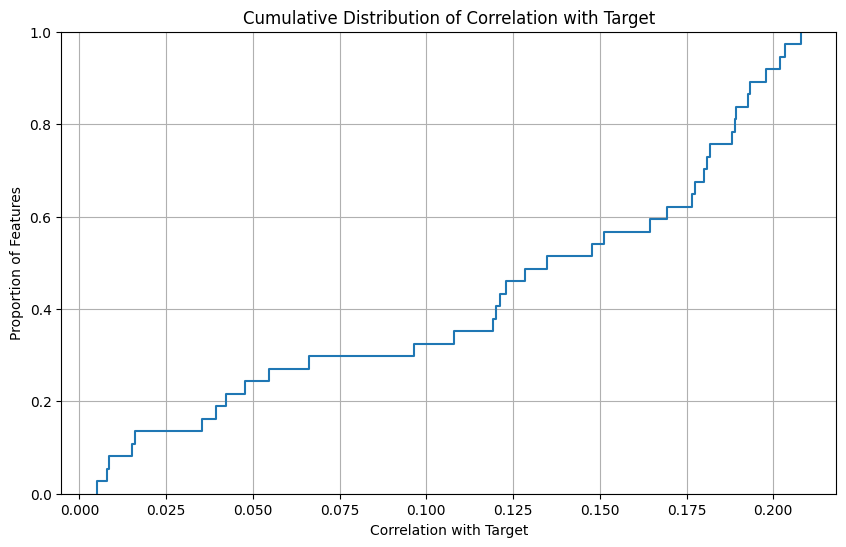

In [2068]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming that rolling data columns end with '_rolling'

rolling_columns = [col for col in matches_rolling.columns if col.endswith('_rolling')]

# Assuming 'merged_data' is your DataFrame, 'features' is a list of your feature names, and 'target' is your target column name
features_target = matches_rolling[rolling_columns + ['target']]
correlation_matrix = features_target.corr()

# Extract the absolute values of the correlations with the target variable, and drop the target-target correlation
target_correlation = correlation_matrix['target'].abs().drop('target')

# Create a cumulative distribution plot for the correlation values
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.ecdfplot(target_correlation)
plt.title("Cumulative Distribution of Correlation with Target")
plt.xlabel("Correlation with Target")
plt.ylabel("Proportion of Features")
plt.grid(True)
plt.show()


The above plot provides a visual representation of how the features correlate with the target. We will select the top 50% of features, which in our case corresponds to a threshold of approximately 0.13. Feel free to adjust this threshold based on your analysis and understanding of the dataset.

In [2069]:

# Set a threshold for selecting features
threshold = 0.13  # This is an example value; you should choose your own threshold

selected_features = target_correlation[target_correlation > threshold].index.tolist()

print("Selected Features based on Correlation Threshold:", selected_features)
print("Number of Selected Features:", len(selected_features))


Selected Features based on Correlation Threshold: ['gf_rolling', 'xg_x_rolling', 'poss_rolling', 'sh_rolling', 'sot_rolling', 'npxg_rolling', 'sota_rolling', 'xag_rolling', 'xa_rolling', 'kp_rolling', '1/3_rolling', 'ppa_rolling', 'prgp_rolling', 'attempted passes_rolling', 'completed passes_rolling', 'tkl+int_rolling', 'mid 3rd_rolling', 'att pen_rolling', 'att 3rd_rolling']
Number of Selected Features: 19


### 5.4 Merge Data of opponent onto single row

A crucial aspect of analysing football matches is considering the performance of both teams involved. Dataquest's implementation [1] looks at a football match from the perspective of one team. That only paints part of the picture. One team's numbers might not be able to tell our model much without context of how our opponent is fairing as well. To give us both perspectives of the match, we will merge the opponents rolling data onto our match row data. This encompasses a more comprehensive dataset that reflects both sides of each match.

In [2070]:
# Mapping to match naming converntion in opponent and team columns
opponent_to_team = {
    "Brighton": "Brighton and Hove Albion",
    "Manchester Utd": "Manchester United",
    "Newcastle Utd": "Newcastle United",
    "Tottenham": "Tottenham Hotspur",
    "West Ham": "West Ham United",
    "Wolves": "Wolverhampton Wanderers",
    "Nott'ham Forest": 'Nottingham Forest',
    'Sheffield Utd': 'Sheffield United',
    'West Brom': 'West Bromwich Albion'
}

# Adding 'date' and 'team' to the list for merging purposes
columns_for_subset = selected_features + ['date', 'team']

# Creating a subset of the dataset with only the necessary columns
rolling_data_subset = matches_rolling[columns_for_subset]

# Normalizing team names in the original dataset's 'opponent' column
matches_rolling['opponent_normalized'] = matches_rolling['opponent'].replace(opponent_to_team)

# Merging the original dataset with the rolling data subset
# Join on the date and the normalized opponent name
merged_data = pd.merge(matches_rolling, rolling_data_subset, left_on=['date', 'opponent_normalized'], right_on=['date', 'team'], suffixes=('', '_opponent'))

# Drop the extra 'team_opponent' column after merging
merged_data.drop(columns=['team_opponent'], inplace=True)

merged_data.head()


,date,time,round,day,venue,result,gf,ga,opponent,xg_x,xga,poss,formation,sh,sot,dist,npxg,g-xg,sota,saves,save%,att (gk),thr,psxg,psxg+/-,ast,xag,xa,kp,1/3,ppa,crspa,prgp,attempted passes,completed passes,corner kicks,shots blocked,tkl+int,err,mid 3rd,att pen,att 3rd,fls,fld,off,season,team,target,venue_code,opp_code,team_code,gf_rolling,ga_rolling,xg_x_rolling,xga_rolling,poss_rolling,sh_rolling,sot_rolling,dist_rolling,npxg_rolling,g-xg_rolling,sota_rolling,saves_rolling,save%_rolling,att (gk)_rolling,thr_rolling,psxg_rolling,psxg+/-_rolling,ast_rolling,xag_rolling,xa_rolling,kp_rolling,1/3_rolling,ppa_rolling,crspa_rolling,prgp_rolling,attempted passes_rolling,completed passes_rolling,corner kicks_rolling,shots blocked_rolling,tkl+int_rolling,err_rolling,mid 3rd_rolling,att pen_rolling,att 3rd_rolling,fls_rolling,fld_rolling,off_rolling,opponent_normalized,gf_rolling_opponent,xg_x_rolling_opponent,poss_rolling_opponent,sh_rolling_opponent,sot_rolling_opponent,npxg_rolling_opponent,sota_rolling_opponent,xag_rolling_opponent,xa_rolling_opponent,kp_rolling_opponent,1/3_rolling_opponent,ppa_rolling_opponent,prgp_rolling_opponent,attempted passes_rolling_opponent,completed passes_rolling_opponent,tkl+int_rolling_opponent,mid 3rd_rolling_opponent,att pen_rolling_opponent,att 3rd_rolling_opponent
0,2020-10-25,19:15,Matchweek 6,Sun,Home,L,0.0,1.0,Leicester City,0.7,0.7,56.0,3-4-3,12.0,4.0,15.0,0.7,-0.7,2.0,1.0,50.0,24.0,6.0,0.3,-0.7,0,0.6,0.7,10.0,41.0,11.0,5.0,50.0,621.0,525.0,9.0,1.0,27,0.0,437.0,21.0,153.0,13.0,9.0,1.0,2021,Arsenal,0,1,11,0,1.6,1.2,1.16,1.26,51.2,8.2,3.8,15.72,1.16,0.44,3.8,2.6,68.5,36.0,4.2,1.04,-0.16,1.2,0.80,0.88,6.0,29.0,7.4,1.6,36.6,608.0,511.4,4.2,3.8,20.8,0.6,317.8,18.2,123.2,8.6,11.6,2.8,Leicester City,2.4,1.62,55.6,8.8,4.0,0.84,4.2,0.54,0.60,6.0,29.6,9.2,41.6,561.6,448.6,30.0,306.2,21.8,144.4
1,2020-11-01,16:30,Matchweek 7,Sun,Away,W,1.0,0.0,Manchester Utd,1.0,0.4,46.0,3-4-3,6.0,1.0,24.6,0.3,0.0,2.0,2.0,100.0,43.0,0.0,0.1,0.1,0,0.2,0.4,5.0,24.0,7.0,2.0,40.0,526.0,438.0,3.0,2.0,32,0.0,298.0,14.0,130.0,12.0,11.0,0.0,2021,Arsenal,1,0,15,0,1.0,1.4,0.92,1.38,51.6,8.0,3.6,15.90,0.92,0.08,3.8,2.4,58.5,35.0,4.8,1.08,-0.32,0.8,0.76,0.82,6.4,29.6,7.4,2.4,37.2,598.6,498.6,5.4,3.8,20.2,0.6,336.6,17.2,124.8,8.8,11.0,2.6,Manchester United,1.8,1.30,55.0,13.6,4.4,0.86,4.6,0.70,0.66,11.2,37.4,8.8,46.2,597.2,494.2,26.0,333.0,24.4,199.2
2,2020-11-08,19:15,Matchweek 8,Sun,Home,L,0.0,3.0,Aston Villa,1.5,1.8,59.0,3-4-3,13.0,2.0,16.4,1.5,-1.5,5.0,3.0,40.0,24.0,1.0,1.6,-0.4,0,0.6,0.6,8.0,30.0,4.0,1.0,43.0,588.0,481.0,3.0,10.0,15,0.0,288.0,25.0,153.0,11.0,13.0,1.0,2021,Arsenal,0,1,1,0,0.8,1.2,0.90,1.06,48.4,7.8,3.2,17.86,0.76,-0.10,3.8,2.6,68.5,37.2,3.6,0.96,-0.24,0.4,0.58,0.58,6.2,26.8,5.6,2.2,34.8,561.8,466.4,4.6,3.0,22.8,0.4,311.6,14.4,117.6,9.0,10.8,1.6,Aston Villa,2.8,1.62,42.8,14.0,6.4,1.48,5.6,1.28,1.04,11.2,21.2,8.2,30.0,374.6,264.4,29.2,192.0,28.8,131.6
3,2020-11-22,16:30,Matchweek 9,Sun,Away,D,0.0,0.0,Leeds United,0.9,1.8,34.0,4-2-3-1,9.0,2.0,19.6,0.9,-0.9,4.0,4.0,100.0,25.0,2.0,0.8,0.8,0,0.7,0.5,6.0,15.0,3.0,0.0,29.0,343.0,236.0,3.0,5.0,21,0.0,184.0,13.0,69.0,8.0,9.0,2.0,2021,Arsenal,0,0,10,0,0.6,1.2,0.94,0.88,53.4,9.6,3.0,18.14,0.80,-0.34,3.2,2.2,64.0,35.2,2.6,0.76,-0.24,0.4,0.54,0.58,7.2,30.6,6.2,2.4,40.8,594.4,500.2,4.6,3.8,22.2,0.2,334.4,17.4,139.4,9.8,11.2,0.8,Leeds United,1.2,1.80,61.4,14.4,5.0,1.80,4.2,1.36,1.22,11.2,36.4,11.6,55.2,587.0,475.0,30.6,318.2,28.6,180.6
4,2020-11-29,19:15,Matchweek 10,Sun,Home,L,1.0,2.0,Wolves,1.5,1.8,56.0,4-2-3-1,13.0,2.0,15.6,1.5,-0.5,5.0,3.0,60.0,17.0,5.0,1.8,-0.2,1,0.8,1.6,6.0,49.0,15.0,2.0,63.0,557.0,447.0,8.0,4.0,22,0.0,307.0,35.0,219.0,13.0,12.0,2.0,2021,Arsenal,0,1,23,0,0.2,1.0,1.00,1.20,47.4,10.2,2.4,18.80,0.86,-0.80,3.6,2.8,74.0,32.8,2.6,0.84,0.04,0.0,0.56,0.56,7.2,25.4,6.0,2.2,36.8,514.8,418.2,4.8,4.4,22.8,0.0,289.2,17.2,119.4,10.8,11.4,1.2,Wolverhampton Wanderers,1.0,0.94,47.8,13.2,4.4,0.94,2.2,0.74,0.62,10.2,37.0,5.8,40.8,511.2,414.6,26.8,306.2,20.8,148.6


### 5.5 Split Data into training and test

Before training our predictive model, we need to divide our dataset into three distinct sets: training, validation, and test sets. This split is crucial for several reasons:

**Training Set**: This is the largest portion of the dataset and is used to train the model. The model learns to recognise patterns and make predictions based on this data.

**Validation Set**: After the model is trained, the validation set is used to evaluate its performance. This helps in fine-tuning the model's hyperparameters without testing on the final test set. It acts as a checkpoint to prevent overfitting.

**Test Set**: This is the final set used to evaluate the model. It should only be used once to assess the performance of the fully trained model. The test set provides an unbiased evaluation of the final model fit on the training dataset.

We will split our dataset based on dates, ensuring that our model is tested on data it hasn't seen during training or validation, simulating real-world predictions. Here's how we split the dataset:

In [2071]:
train = merged_data[merged_data["date"] < '2023-03-01']
validation = merged_data[(merged_data["date"] >= '2023-03-01') & (merged_data["date"] < '2023-06-01')] 
test = merged_data[merged_data["date"] >= '2023-06-01']

# Define the features and target variable
features = rolling_columns + ['venue_code', 'opp_code', 'team_code']

train_features = train[features]
train_target = train["target"]

validation_features = validation[features]
validation_target = validation["target"]

test_features = test[features]
test_target = test["target"] 

Now that we have used the power of pandas' extensive libraries to handle a wide range of datatypes, easier methods of preprocessing, we will convert our data into a numpy array. This will allow for faster mathematical computations when we start using our neural network

In [2072]:
# Converting to NumPy arrays
train_features_np = train_features.values.astype(np.float32)
train_target_np = train_target.values.astype(np.float32)
validation_features_np = validation_features.values.astype(np.float32)
validation_target_np = validation_target.values.astype(np.float32)
test_features_np = test_features.values.astype(np.float32)
test_target_np = test_target.values.astype(np.float32)


### 5.6 Normalise Data

Before feeding our data into a machine learning model, it's important to normalise it. Normalisation is a preprocessing step used to scale numeric features in the dataset into a common range, typically between 0 and 1. It ensures that each feature contributes proportionately to the final prediction. This process helps in speeding up training and can lead to better model performance since many machine learning algorithms are sensitive to the scale of input data.

Additionally, we will fill any NaN values with zero. This is a simple imputation strategy to handle missing values in our data. With knowledge of our dataset from the source tutorial [1], we know that nan values are as a result of the event not occuring hence 0 is appropriate substittution. However, keep in mind that different strategies might be more suitable depending on the nature of your data and the expected impact of these missing values.

After normalization, it's important to convert the data into tensors, which are the primary data structures used by neural networks in PyTorch. Here's how we can normalize our data and then convert it into tensors:

Here's the code implementation for normalising our data:

In [2073]:
from sklearn.preprocessing import MinMaxScaler

# Creating the scaler instance
min_max_scaler = MinMaxScaler()

# fill nan values with 0
train_features_np = np.nan_to_num(train_features_np)
test_features_np = np.nan_to_num(test_features_np)
validation_features_np = np.nan_to_num(validation_features_np)


# Fitting the scaler to the training data and transforming both training and test data
train_features_min_max = min_max_scaler.fit_transform(train_features_np)
validation_features_min_max = min_max_scaler.transform(validation_features_np)
test_features_min_max = min_max_scaler.transform(test_features_np)



In [2074]:
# convert the data to tensors to feed into the model
training_input = torch.FloatTensor(train_features_min_max)
training_output = torch.FloatTensor(train_target_np)
validation_input = torch.FloatTensor(validation_features_min_max)
validation_output = torch.FloatTensor(validation_target_np)
test_input = torch.FloatTensor(test_features_min_max)
test_output = torch.FloatTensor(test_target_np)

<a id='6-building-neural-network-with-pytorch'></a>
### 6. Building Neural Network with Pytorch

Now we shall define our neural network for our predictive model. Before we start building our model, we set a seed value for reproducibility. This helps to ensure that our results are consistent each time we run our code. It's crucial for the experimental process, allowing us to compare results under the same initial conditions.

Here's the code for setting the seed and defining our neural network architecture:

In [2075]:
# for reproducibility
seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)

In [2076]:
# source [2] 
# https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538

import torch
class Net(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Net, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size)
        self.relu = torch.nn.ReLU()
        self.fc2 = torch.nn.Linear(self.hidden_size, 1)
        self.sigmoid = torch.nn.Sigmoid() 
    def forward(self, x):
        hidden = self.fc1(x)
        relu = self.relu(hidden)
        output = self.fc2(relu)
        output = self.sigmoid(output)
        return output
    
#  end of source [2]

<a id='7-train-model'></a>
### 7. Train Model

Training a neural network is a critical step where the model learns to make predictions by adjusting its weights based on the input data. In this section, we'll walk through the process of training our neural network, which includes setting the parameters, defining the loss function, choosing an optimizer, and iterating through the epochs.

Here are the key steps in our training process:

Defining the Model Architecture: We instantiate our neural network model by specifying the input size (number of features) and the hidden layer size. The hidden layer size is a hyperparameter that we can tune.

Loss Function and Optimizer: For our binary classification task, we use the Binary Cross-Entropy Loss (BCELoss), which is well-suited for binary outcomes. The optimizer updates the model's weights; here, we use Stochastic Gradient Descent (SGD) with a learning rate and momentum parameter.

Evaluating the Model Before Training: It's useful to assess the model's performance before training to establish a baseline. We use precision as one of our evaluation metrics, which measures the accuracy of the positive predictions,  alongside the standard accuracy metric and a confusion matrix.

Training Loop: The training loop involves repeatedly passing the training data through the model (forward pass), calculating the loss, and updating the model's weights (backward pass). We'll track the loss at each epoch to monitor the training process.

Evaluating the Model After Training: After training, we evaluate the model again to see the improvements made through the training process.

Here's the implementation of the training process:

In [2077]:
# source [2] 
# https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538

input_size = training_input.size()[1] # number of features selected
hidden_size = 30 # number of nodes/neurons in the hidden layer
model = Net(input_size, hidden_size) # create the model
criterion = torch.nn.BCELoss() # works for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr = 0.9, momentum=0.2)

# end of source [2]

In [2078]:
# source [2] 
# https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538

# evaluate the model before training
model.eval()
y_pred = model(test_input)
before_train = criterion(y_pred.squeeze(), test_output)
print('Test loss before training' , before_train.item())

# end of source [2]

Test loss before training 0.6917647123336792


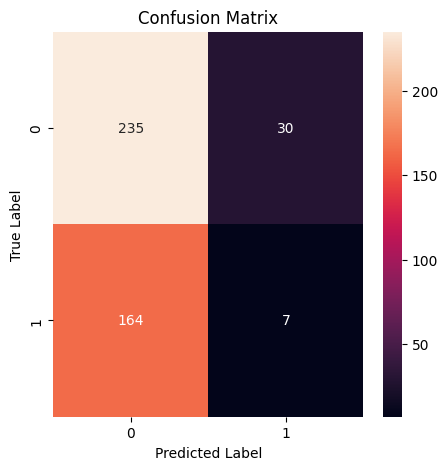

In [2079]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert predictions to binary format
y_pred_binary = (y_pred.squeeze() > 0.5).float()

# Create the confusion matrix
cm = confusion_matrix(test_output.numpy(), y_pred_binary.numpy())

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [2080]:
def evaluate_model(model, val_inputs, val_outputs):
    model.eval()
    with torch.no_grad():
        predictions = model(val_inputs)
        accuracy = ((predictions.squeeze() > 0.5) == val_outputs).float().mean().item()
    return accuracy


In [2081]:
accuracy = evaluate_model(model, validation_input, validation_output)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.63%


In [2082]:
from sklearn.metrics import precision_score

# Make predictions
model.eval()
y_pred = model(test_input)
y_pred = (y_pred.squeeze() > 0.5).float()  # Convert probabilities to binary predictions

# Calculate precision
precision = precision_score(test_output, y_pred)
print(f"Precision before training: {precision * 100:.2f}%" )

Precision before training: 18.92%


In [2083]:
def trainFunction(model, optimizer, criterion, training_input, training_output, epochs):
    model.train()
    errors = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        # Forward pass
        y_pred = model(training_input)
        # Compute Loss
        loss = criterion(y_pred.squeeze(), training_output)
        errors.append(loss.item())
        # print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
        # Backward pass
        loss.backward()
        optimizer.step()
    return errors


In [2084]:
# source [2] 
# https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538

# torch.set_grad_enabled(True)
input_size = training_input.size()[1] # number of features selected
hidden_size = 30 # number of nodes/neurons in the hidden layer
model = Net(input_size, hidden_size) # create the model
criterion = torch.nn.BCELoss() # works for binary classification
optimizer = torch.optim.SGD(model.parameters(), lr = 0.9, momentum=0.2)

#  end of source [2]

model.train()
# Call the train function
epochs = 400
errors = trainFunction(model, optimizer, criterion, training_input, training_output, epochs)


In [2085]:
# evaluate the model after training
model.eval()
y_pred = model(test_input)
after_train = criterion(y_pred.squeeze(), test_output)
print('Test loss after Training' , after_train.item())

Test loss after Training 0.645779550075531


<a id='8-plot-the-loss-of-your-model-over-training'></a> 
### 8. Plot the loss of your model over training

Visualizing the training progress of a neural network is important for understanding how well the model is learning. One of the most informative visualizations in this context is the plot of the model's loss over each training epoch. A loss plot can provide insights into how quickly or effectively the model is converging towards minimizing the error.

The second chart represents the real values (Win at x = 1, Draw-Defeat at x = 0) with yellow circles; and the predicted values with blue crosses. The closer the blue cross is to the yellow circle, the more this prediction is accurated

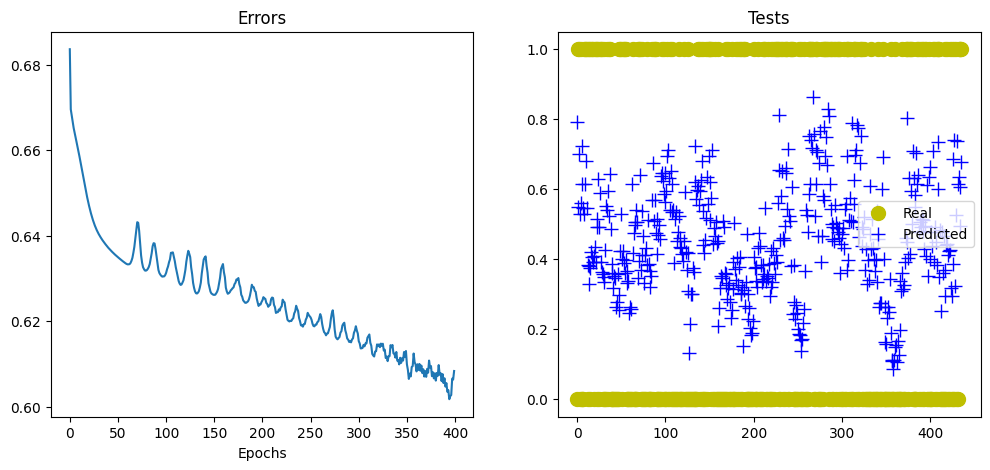

In [2086]:
# source [2] 
# https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Errors')
    plt.plot(errors, '-')
    plt.xlabel('Epochs')
    graf03 = plt.subplot(1, 2, 2)
    graf03.set_title('Tests')
    a = plt.plot(test_output.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Predicted')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
plotcharts(errors)
# end of source [2]

Through these plots, we get a visual feedback loop that aids in tuning our model for better performance. The error plot helps us in understanding the learning curve, and the test plot visually demonstrates how close the model's predictions are to the actual outcomes.

<a id='9-evaluate-performance-of-the-model'></a> 
### 9. Evaluate Performance of the Model

After training our neural network, we evaluate the models performance to understand how well it has learned to predict match outcomes. In this section, we will use different metrics to gauge the model's effectiveness on our test dataset. These metrics provide us with insights into various aspects of the model's predictive capabilities.

Accuracy: This is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations. Accuracy gives us a baseline for the effectiveness of our model.

Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. Good precision indicates our model has an understanding of what factors lead to a team winning a match.

Confusion Matrix: Additionally, we visualize the model's performance using a confusion matrix, which not only highlights the successes (true positives and true negatives) but also sheds light on the errors made (false positives and false negatives).

Here's how we can compute these metrics using PyTorch and sklearn:

In [2087]:
# source [2] 
# https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient computation
    # Get predictions
    outputs = model(test_input)
    predicted = (outputs.squeeze() > 0.5).long()  # Convert probabilities to class labels

# Calculate accuracy
accuracy = (predicted == test_output).float().mean()  # Mean of correct predictions
print(f"Accuracy: {accuracy * 100:.2f}%")
# end of source [2]

Accuracy: 64.45%


In [2088]:
from sklearn.metrics import precision_score

# Make predictions
model.eval()
y_pred = model(test_input)
y_pred = (y_pred.squeeze() > 0.5).float()  # Convert probabilities to binary predictions

# Calculate precision
precision = precision_score(test_output, y_pred)
print(f"Precision after training: {precision * 100:.2f}%" )


Precision after training: 54.88%


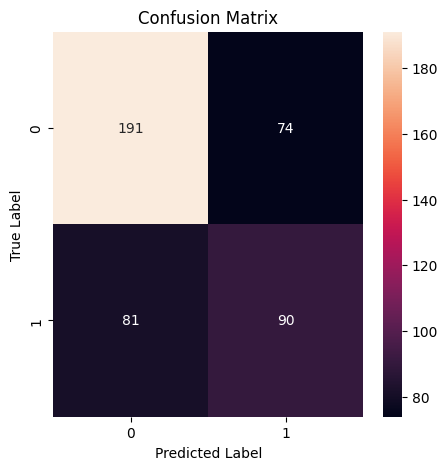

In [2089]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert predictions to binary format
y_pred_binary = (y_pred.squeeze() > 0.5).float()

# Create the confusion matrix
cm = confusion_matrix(test_output.numpy(), y_pred_binary.numpy())

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Our evaluation of the model's performance post-training reveals a notable improvement over its initial, untrained state. Significantly, the precision has surged from 18% to 54.8%, underscoring the model's enhanced proficiency in correctly predicting wins. While the accuracy has seen a moderate ascent from 62.63% to 64.45%, the improvement is best understood in the context of the model's initial tendency to predict non-winning outcomes, a likely consequence of the dataset's imbalance where approximately 60% of the instances belong to the draw-lose class. Prior to training, this bias towards the majority class resulted in a deceptively high accuracy, masking the model's lack of discriminative power. Prior it predicted 91% of matches to belong to class 0.

Post-training, the model exhibits a more varied prediction pattern, indicating a shift away from a simplistic strategy of favoring the more common class. This change reflects a deeper comprehension of the factors influencing match victories and a move towards more nuanced predictions, as displayed by the model only predicting class 0 62% of the time now. Crucially, the post-training confusion matrix illustrates the model's newfound ability to discern true positives and negatives more effectively, affirming a balanced approach to prediction. The model now not only achieves higher accuracy but does so with a richer understanding of match dynamics, representing a significant stride towards capturing the complexity of real-world match outcomes.

<a id='10-hyperparameter-tuning'></a> 
### 10. Hyperparameter Tuning

Hyperparameter tuning is a vital process in machine learning, where we systematically vary the parameters of our model to find the optimal configuration for the best performance. Unlike model parameters, which are learned during training, hyperparameters are set prior to the training process and can have a significant impact on the learning and prediction ability of the model.

In this section, we will conduct hyperparameter tuning using a grid search approach. Grid search tests every combination of a predefined list of values of hyperparameters. It's a comprehensive, though computationally expensive, method to find the best combination for our model.

We will record the accuracy of each combination then plot a graph at the end to see how changing values of each hyperparameter while keeping the others controlled affected performance. This approach provides a deeper insight into the sensitivity and influence of each hyperparameter on our model, allowing us to fine-tune our network more effectively.

We'll focus on tuning several hyperparameters:

- **Learning Rate (lr)**: Determines how much to adjust the model in response to the estimated error each time the model weights are updated.
- **Hidden Layer Size (hidden_size)**: The number of nodes in the hidden layer.
- **Number of Epochs (epochs)**: The number of complete passes through the training dataset.
- **Optimizer Type (optimizer)**: Algorithm to update the weights of the network.
- **Momentum (momentum)**: Helps to accelerate gradients vectors in the right direction, leading to faster converging.
Here's how we implement the grid search:

In [2090]:
# initialise search space

hyperparameters = {
    'lr': [0.001, 0.01, 0.1],  # Learning rate
    'hidden_size': [10, 20, 30], # Number of nodes in the hidden layer
    'epochs': [100, 200 ,400, 600, 1000 ,2000], # Number of epochs
    'optimizer' : ['Adam', 'SGD'], # Optimizer
    'momentum': [0.0, 0.5, 0.9] # Momentum
    # Add other hyperparameters here
}


In [2091]:
# import itertools
# from collections import defaultdict

# def grid_search(hyperparameters, training_data, training_output, input_size, validation_input, validation_output):
#     results = []
#     best_performance = float('-inf')
#     best_params = None
#     performance_dict = defaultdict(list)

#     for lr, hidden_size, epochs, optimizer_type, momentum in itertools.product(hyperparameters['lr'], hyperparameters['hidden_size'], hyperparameters['epochs'], hyperparameters['optimizer'], hyperparameters['momentum']):
#         # Initialize model
#         model = Net(input_size, hidden_size)

#         # Initialize optimizer
#         if optimizer_type == 'Adam':
#             optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#         elif optimizer_type == 'SGD':
#             optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)

#         # Train the model
#         trainFunction(model, optimizer, criterion, training_data, training_output, epochs)

#         # Evaluate the model
#         performance = evaluate_model(model, validation_input, validation_output)

#         # Store performance in the dictionary
#         performance_dict['lr'].append((lr, performance))
#         performance_dict['hidden_size'].append((hidden_size, performance))
#         performance_dict['epochs'].append((epochs, performance))
#         performance_dict['optimizer'].append((optimizer_type, performance))
#         performance_dict['momentum'].append((momentum, performance))

#         # Update best performance
#         if performance > best_performance:
#             best_performance = performance
#             best_params = {
#                 'lr': lr, 'hidden_size': hidden_size, 'epochs': epochs,
#                 'optimizer': optimizer_type, 'momentum': momentum
#             }

#     return best_params, best_performance, performance_dict


In [2092]:
import itertools
from collections import defaultdict

def grid_search(hyperparameters, training_data, training_output, input_size, validation_input, validation_output):
    # results = []  # This is not used in the original code, so we can remove it
    best_performance = float('-inf')
    best_params = None
    performance_dict = defaultdict(list)
    performance_list = []  # To capture the performance for each combination

    for lr, hidden_size, epochs, optimizer_type, momentum in itertools.product(
        hyperparameters['lr'],
        hyperparameters['hidden_size'],
        hyperparameters['epochs'],
        hyperparameters['optimizer'],
        hyperparameters['momentum']
    ):
        # Initialize model
        model = Net(input_size, hidden_size)

        # Initialize optimizer
        if optimizer_type == 'Adam':
            optimizer = torch.optim.Adam(model.parameters(), lr=lr)
            current_momentum = None  # Momentum is not used with Adam
        elif optimizer_type == 'SGD':
            optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum)
            current_momentum = momentum  # Use the provided momentum value

        # Train the model
        trainFunction(model, optimizer, criterion, training_data, training_output, epochs)

        # Evaluate the model
        performance = evaluate_model(model, validation_input, validation_output)

        # Store performance in the list with corresponding hyperparameters
        performance_list.append({
            'lr': lr,
            'hidden_size': hidden_size,
            'epochs': epochs,
            'optimizer': optimizer_type,
            'momentum': current_momentum,
            'performance': performance
        })

        # Update best performance
        if performance > best_performance:
            best_performance = performance
            best_params = {
                'lr': lr,
                'hidden_size': hidden_size,
                'epochs': epochs,
                'optimizer': optimizer_type,
                'momentum': current_momentum
            }

    return best_params, best_performance, performance_list

# Now, let's define the hyperparameters and run the grid search
# Assuming you have a dictionary called `hyperparameters` with your ranges defined
# Also assuming the functions `Net`, `trainFunction`, and `evaluate_model` are defined, as well as `training_data`, `training_output`, etc.



In [2093]:
best_params, best_performance, results = grid_search(hyperparameters, training_input, training_output, input_size, test_input, test_output)
print(f"Best hyperparameters: {best_params}, Best performance: {best_performance}")

Best hyperparameters: {'lr': 0.001, 'hidden_size': 10, 'epochs': 600, 'optimizer': 'Adam', 'momentum': None}, Best performance: 0.6605504751205444


In [2094]:
# # Print out the performance of each combination
# for combo in results:
#     print(combo)

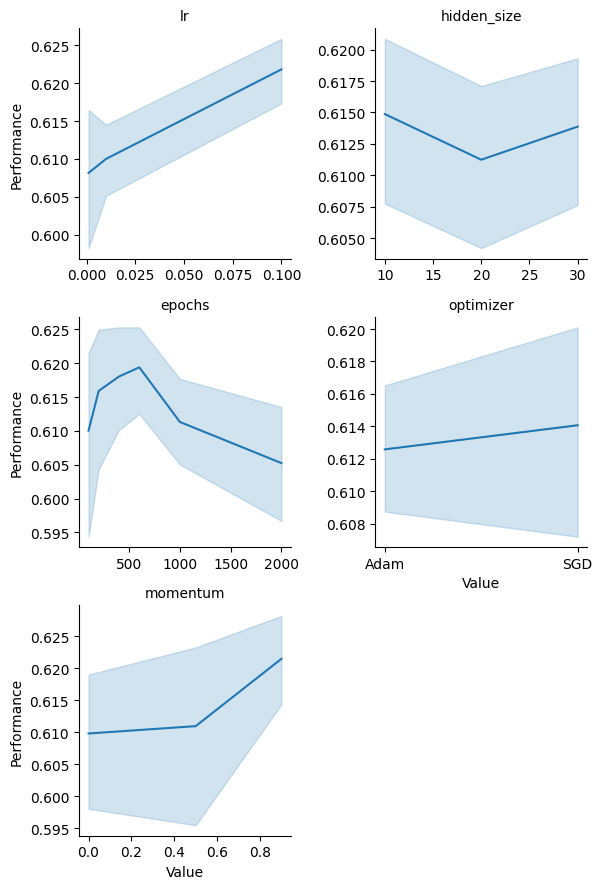

In [2095]:
# Convert the performance list to a DataFrame for easy plotting
performance_df = pd.DataFrame(results)

# Now, create separate columns for each hyperparameter in the DataFrame
performance_df['lr'] = [d['lr'] for d in results]
performance_df['hidden_size'] = [d['hidden_size'] for d in results]
performance_df['epochs'] = [d['epochs'] for d in results]
performance_df['optimizer'] = [d['optimizer'] for d in results]
performance_df['momentum'] = [d['momentum'] for d in results]
performance_df['Performance'] = [d['performance'] for d in results]

# Plot the performance for different hyperparameters using seaborn
# Here we need to melt the DataFrame to have 'Hyperparameter' and 'Value' columns
performance_melted_df = performance_df.melt(id_vars=['Performance'], 
                                            value_vars=['lr', 'hidden_size', 'epochs', 'optimizer', 'momentum'],
                                            var_name='Hyperparameter', value_name='Value')

g = sns.FacetGrid(performance_melted_df, col="Hyperparameter", col_wrap=2, sharex=False, sharey=False)
g.map_dataframe(sns.lineplot, x='Value', y='Performance')
g.add_legend()
g.set_titles(col_template="{col_name}")

plt.show()


In [2096]:
# # Convert the performance dictionary to a DataFrame for easy plotting
# performance_df = pd.DataFrame({
#     'Hyperparameter': np.repeat(list(results.keys()), [len(v) for v in results.values()]),
#     'Value': [item for sublist in results.values() for item, _ in sublist],
#     'Performance': [perf for sublist in results.values() for _, perf in sublist]
# })

# g = sns.FacetGrid(performance_df, col="Hyperparameter", col_wrap=2, sharex=False, sharey=False)
# g.map_dataframe(sns.lineplot, x='Value', y='Performance')
# g.add_legend()
# g.set_titles(col_template="{col_name}")

# plt.show()

<a id='11-final-model'></a> 
### 11. Final Model

In this section, we'll use the selected hyperparameters to configure our neural network and train it with our dataset. This final iteration of the model should ideally represent the most effective version, considering all the adjustments and improvements we've made.

training set Best hyperparameters: {'lr': 0.1, 'hidden_size': 20, 'epochs': 50, 'optimizer': 'Adam', 'momentum': None}, Best performance: 0.6674311757087708

training Best hyperparameters: {'lr': 0.001, 'hidden_size': 10, 'epochs': 600, 'optimizer': 'Adam', 'momentum': None}, Best performance: 0.6605504751205444




In [2097]:
# # train with best hyperparameters

# selected_features

# input_size = training_input.size()[1] # number of features selected
# hidden_size = 30 # number of nodes/neurons in the hidden layer
# model = Net(input_size, hidden_size) # create the model
# criterion = torch.nn.BCELoss() # works for binary classification
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.2)

# # Call the train function
# epochs = 400
# errors = trainFunction(model, optimizer, criterion, training_input, training_output, epochs)


In [2111]:
# for reproducibility
seed_value = 42
torch.manual_seed(seed_value)
np.random.seed(seed_value)

In [2132]:
# train with best hyperparameters

selected_features

input_size = training_input.size()[1] # number of features selected
hidden_size = 10 # number of nodes/neurons in the hidden layer
model = Net(input_size, hidden_size) # create the model
criterion = torch.nn.BCELoss() # works for binary classification
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Call the train function
epochs = 600
errors = trainFunction(model, optimizer, criterion, training_input, training_output, epochs)


In [2133]:
accuracy = evaluate_model(model, test_input, test_output)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 65.60%


In [2134]:
# Make predictions
model.eval()
y_pred = model(test_input)
y_pred = (y_pred.squeeze() > 0.5).float()  # Convert probabilities to binary predictions

# Calculate precision
precision = precision_score(test_output, y_pred)
print(f"Precision after training: {precision * 100:.2f}%" )

Precision after training: 59.81%


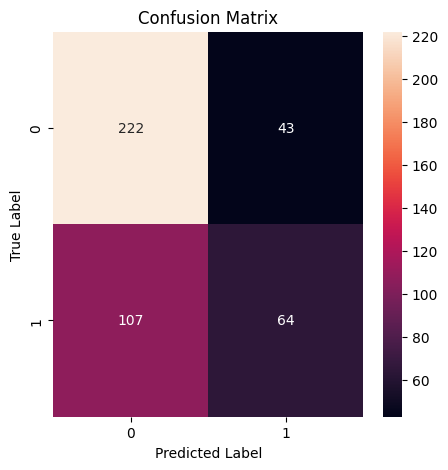

In [2135]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Convert predictions to binary format
y_pred_binary = (y_pred.squeeze() > 0.5).float()

# Create the confusion matrix
cm = confusion_matrix(test_output.numpy(), y_pred_binary.numpy())

# Plot the confusion matrix
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

<a id='12-display-Predictions'></a> 
### 12. Display Predictions

The final step in our predictive analysis is to present our neural network's forecasts in a user-friendly manner. This entails translating the network's output into a comprehensible format, which involves mapping the predicted and actual match results to the corresponding match data.

We will utilise our model's output to craft a DataFrame combining match details such as date, team, opponent, and round, with both predicted and actual outcomes. To reflect the complete picture of the match, we will merge the home and away predictions to deduce a unified outcome. The final match result, from the perspective of the home team, will be distilled into a win, draw, or loss based on logical decision rules.

The following code segment walks through these steps, including DataFrame creation, data merging, and the application of a function to interpret the final predictions.

In [2103]:
import pandas as pd

# Set the model to evaluation mode
model.eval()

# Generate predictions
with torch.no_grad():  # Disable gradient computation
    predictions = model(test_input)

# Convert predictions to a binary format if using sigmoid in the output layer
predicted_labels = torch.round(predictions).squeeze()

# Convert tensors to numpy arrays for easier handling
predicted_labels = predicted_labels.numpy()
actual_labels = test_output.numpy()  # Assuming test_output is your actual labels tensor

# Combine team names and dates from the test set with predictions and actual labels
results_df = pd.DataFrame({
    'Date': test['date'],      
    'Team': test['team'], 
    'Venue': test['venue'], 
    'Opponent': test['opponent'],
    'Round': test['round'],     
    'Predicted': predicted_labels,
    'Actual': actual_labels
})

# Print or process the results
print("Predictions vs Actual:")
results_df


Predictions vs Actual:


,Date,Team,Venue,Opponent,Round,Predicted,Actual
57,2023-09-24,Arsenal,Home,Tottenham,Matchweek 6,1.0,0.0
58,2023-09-30,Arsenal,Away,Bournemouth,Matchweek 7,1.0,1.0
59,2023-10-08,Arsenal,Home,Manchester City,Matchweek 8,1.0,1.0
60,2023-12-09,Arsenal,Away,Aston Villa,Matchweek 16,0.0,0.0
61,2023-12-17,Arsenal,Home,Brighton,Matchweek 17,1.0,1.0
...,...,...,...,...,...,...,...
1471,2023-12-17,Wolverhampton Wanderers,Away,West Ham,Matchweek 17,0.0,0.0
1472,2023-12-24,Wolverhampton Wanderers,Home,Chelsea,Matchweek 18,0.0,1.0
1473,2023-12-27,Wolverhampton Wanderers,Away,Brentford,Matchweek 19,0.0,1.0
1474,2023-12-30,Wolverhampton Wanderers,Home,Everton,Matchweek 20,0.0,1.0


Now we have predicitons for all the matches, but there are still duplicates for each match as there is a prediciton from the home teams perspective and the away team's perpective. Now we will go onto merge the two predictions and deduce a final prediction from there. 

In [2104]:
class MissingDict(dict):
    __missing__ = lambda self, key: key

# Naming convention for teams on opponent column is not consistent with the team column.
# We will use a dictionary to map the names to the same convention to allow us to merge the dataframes

map_values = {"Brighton and Hove Albion": "Brighton", "Manchester United": "Manchester Utd", 
              "Newcastle United": "Newcastle Utd", "Tottenham Hotspur": "Tottenham", 
              "West Ham United": "West Ham", "Wolverhampton Wanderers": "Wolves", 
              'Nottingham Forest': 'Nott\'ham Forest', 'Sheffield United': 'Sheffield Utd', 
              'West Bromwich Albion': 'West Brom'} 
mapping = MissingDict(**map_values)

In [2105]:
# merge the dataframes
results_df["New_team"] = results_df["Team"].map(mapping)
results_df["Opponent"] = results_df["Opponent"].map(mapping)
merged = results_df.merge(results_df, left_on=["Date", "New_team"], right_on=["Date", "Opponent"])

In [2106]:
merged

,Date,Team_x,Venue_x,Opponent_x,Round_x,Predicted_x,Actual_x,New_team_x,Team_y,Venue_y,Opponent_y,Round_y,Predicted_y,Actual_y,New_team_y
0,2023-09-24,Arsenal,Home,Tottenham,Matchweek 6,1.0,0.0,Arsenal,Tottenham Hotspur,Away,Arsenal,Matchweek 6,0.0,0.0,Tottenham
1,2023-09-30,Arsenal,Away,Bournemouth,Matchweek 7,1.0,1.0,Arsenal,Bournemouth,Home,Arsenal,Matchweek 7,0.0,0.0,Bournemouth
2,2023-10-08,Arsenal,Home,Manchester City,Matchweek 8,1.0,1.0,Arsenal,Manchester City,Away,Arsenal,Matchweek 8,1.0,0.0,Manchester City
3,2023-12-09,Arsenal,Away,Aston Villa,Matchweek 16,0.0,0.0,Arsenal,Aston Villa,Home,Arsenal,Matchweek 16,0.0,1.0,Aston Villa
4,2023-12-17,Arsenal,Home,Brighton,Matchweek 17,1.0,1.0,Arsenal,Brighton and Hove Albion,Away,Arsenal,Matchweek 17,1.0,0.0,Brighton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2023-12-17,Wolverhampton Wanderers,Away,West Ham,Matchweek 17,0.0,0.0,Wolves,West Ham United,Home,Wolves,Matchweek 17,1.0,1.0,West Ham
432,2023-12-24,Wolverhampton Wanderers,Home,Chelsea,Matchweek 18,0.0,1.0,Wolves,Chelsea,Away,Wolves,Matchweek 18,0.0,0.0,Chelsea
433,2023-12-27,Wolverhampton Wanderers,Away,Brentford,Matchweek 19,0.0,1.0,Wolves,Brentford,Home,Wolves,Matchweek 19,0.0,0.0,Brentford
434,2023-12-30,Wolverhampton Wanderers,Home,Everton,Matchweek 20,0.0,1.0,Wolves,Everton,Away,Wolves,Matchweek 20,0.0,0.0,Everton


In [2107]:
#  final prediction logic getting net result from the two points of view
def final_prediction(row):
    if row['Predicted_x'] == 1 and row['Predicted_y'] == 0:
        # Team wins, Opponent loses
        final_pred = "W"
    elif row['Predicted_x'] == 0 and row['Predicted_y'] == 1:
        # Team loses, Opponent wins
        final_pred = "L"
    else:
        # Both predicted to have same result, contradictory
        final_pred = "D"
    return final_pred
  
merged['Final_prediction'] = merged.apply(final_prediction, axis=1)

In [2108]:
merged

,Date,Team_x,Venue_x,Opponent_x,Round_x,Predicted_x,Actual_x,New_team_x,Team_y,Venue_y,Opponent_y,Round_y,Predicted_y,Actual_y,New_team_y,Final_prediction
0,2023-09-24,Arsenal,Home,Tottenham,Matchweek 6,1.0,0.0,Arsenal,Tottenham Hotspur,Away,Arsenal,Matchweek 6,0.0,0.0,Tottenham,W
1,2023-09-30,Arsenal,Away,Bournemouth,Matchweek 7,1.0,1.0,Arsenal,Bournemouth,Home,Arsenal,Matchweek 7,0.0,0.0,Bournemouth,W
2,2023-10-08,Arsenal,Home,Manchester City,Matchweek 8,1.0,1.0,Arsenal,Manchester City,Away,Arsenal,Matchweek 8,1.0,0.0,Manchester City,D
3,2023-12-09,Arsenal,Away,Aston Villa,Matchweek 16,0.0,0.0,Arsenal,Aston Villa,Home,Arsenal,Matchweek 16,0.0,1.0,Aston Villa,D
4,2023-12-17,Arsenal,Home,Brighton,Matchweek 17,1.0,1.0,Arsenal,Brighton and Hove Albion,Away,Arsenal,Matchweek 17,1.0,0.0,Brighton,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2023-12-17,Wolverhampton Wanderers,Away,West Ham,Matchweek 17,0.0,0.0,Wolves,West Ham United,Home,Wolves,Matchweek 17,1.0,1.0,West Ham,L
432,2023-12-24,Wolverhampton Wanderers,Home,Chelsea,Matchweek 18,0.0,1.0,Wolves,Chelsea,Away,Wolves,Matchweek 18,0.0,0.0,Chelsea,D
433,2023-12-27,Wolverhampton Wanderers,Away,Brentford,Matchweek 19,0.0,1.0,Wolves,Brentford,Home,Wolves,Matchweek 19,0.0,0.0,Brentford,D
434,2023-12-30,Wolverhampton Wanderers,Home,Everton,Matchweek 20,0.0,1.0,Wolves,Everton,Away,Wolves,Matchweek 20,0.0,0.0,Everton,D


In [2109]:
# now simplify the dataframe back to single team perspective and maintain relevant columns
from datetime import datetime

prediction = merged[["Date", "Round_x" , "Venue_x" ,"Team_x", "Opponent_x", "Final_prediction"]]
prediction = prediction.rename(columns={"Round_x": "Round", "Venue_x": "Venue", "Team_x": "Team", "Opponent_x": "Opponent", "Final_prediction": "Prediction"})
prediction.sort_values(by='Date', ascending=False)
prediction

,Date,Round,Venue,Team,Opponent,Prediction
0,2023-09-24,Matchweek 6,Home,Arsenal,Tottenham,W
1,2023-09-30,Matchweek 7,Away,Arsenal,Bournemouth,W
2,2023-10-08,Matchweek 8,Home,Arsenal,Manchester City,D
3,2023-12-09,Matchweek 16,Away,Arsenal,Aston Villa,D
4,2023-12-17,Matchweek 17,Home,Arsenal,Brighton,D
...,...,...,...,...,...,...
431,2023-12-17,Matchweek 17,Away,Wolverhampton Wanderers,West Ham,L
432,2023-12-24,Matchweek 18,Home,Wolverhampton Wanderers,Chelsea,D
433,2023-12-27,Matchweek 19,Away,Wolverhampton Wanderers,Brentford,D
434,2023-12-30,Matchweek 20,Home,Wolverhampton Wanderers,Everton,D


In [2110]:
# remove redundancy by only keeping home point of view
prediction = prediction[prediction['Venue'] != 'Away']
prediction = prediction.drop(columns=['Venue'])
prediction

,Date,Round,Team,Opponent,Prediction
0,2023-09-24,Matchweek 6,Arsenal,Tottenham,W
2,2023-10-08,Matchweek 8,Arsenal,Manchester City,D
4,2023-12-17,Matchweek 17,Arsenal,Brighton,D
6,2023-12-28,Matchweek 19,Arsenal,West Ham,W
8,2024-01-20,Matchweek 21,Arsenal,Crystal Palace,W
...,...,...,...,...,...
429,2023-12-05,Matchweek 15,Wolverhampton Wanderers,Burnley,D
430,2023-12-09,Matchweek 16,Wolverhampton Wanderers,Nott'ham Forest,D
432,2023-12-24,Matchweek 18,Wolverhampton Wanderers,Chelsea,D
434,2023-12-30,Matchweek 20,Wolverhampton Wanderers,Everton,D


<a id='13-conclusiion'></a> 
### 13. Conclusion

This tutorial has successfully walked through the process of building a machine learning model to predict Premier League match outcomes. Starting with data collection and preprocessing, we highlighted the importance of contextual data by integrating both team and opponent statistics. Feature selection and normalisation streamlined our model, making it efficient and effective. Our exploration into neural network architecture and the subsequent hyperparameter tuning showcased the intricacies of model optimisation. We crafted visualisations to inform us on model performance and aid in further fine tuning. The final model's evaluation illustrated the potency of machine learning in sports analytics, providing valuable insights into the practical aspects of predictive modeling in football.

<a id='14-differences-and-similarities'></a> 
### 14. Enhancements From Source Tutorials

**Similarities:**

- The Neural Network class structure was adapted from Andre Luiz's implementation[2].

- The approach to presenting data in a reader-friendly format in Section 12 was inspired by Dataquest's implementation[3].

- Transformation of string fields like venue, team names, and results into categorical values was guided by Dataquest's practices[3].

- The initial calculations of rolling averages for team statistics were based on techniques presented by Dataquest[3].

**Differences:**

- Enhancing the rolling stats method from Dataquest[3], I integrated the opposing team's match data into the same dataset to provide a comprehensive view of both teams for more informed predictions.

- Unlike the referenced sources[2][3], feature selection was implemented using a filter method to concentrate our model's learning on the most impactful features.

- Data normalization was methodically applied to standardize the range of our feature sets.

- Hyperparameter tuning was carried out, an optimization step not addressed by sources[2][3], to fine-tune our model's performance.

- Rigorous performance evaluations, including accuracy and precision metrics, were conducted before and after training, offering valuable insights into the benefits of our modeling approach.

- We integrated confusion matrix visualizations, enhancing the interpretability of our model's predictions, a step beyond the scope of sources[2][3].


<a id='15-references'></a> 
### 15. References



1. Andre Luiz, (Date of Publication). 'PyTorch Neural Networks to Predict Matches Results in Soccer Championships - Part I', Medium. Available at: https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-i-a6d0eefeca51 (Accessed: 2 March 2024).

2. Andre Luiz, (Date of Publication). 'PyTorch Neural Networks to Predict Matches Results in Soccer Championships - Part II', Medium. Available at: https://medium.com/@andreluiz_4916/pytorch-neural-networks-to-predict-matches-results-in-soccer-championships-part-ii-3d02b2ddd538 (Accessed: 8 March 2024).

3. Dataquest, (Date of Publication). 'Portfolio Project: Predicting EPL Football Match Winners Using Machine Learning', Dataquest. Available at: https://app.dataquest.io/m/99992/portfolio-project%3A-predicting-epl-football-match-winners-using-machine-learning/1/project-overview (Accessed: 28 February 2024).


